# Dimensionality reduction

---
Author: Anatoliy Durkin

Updated: 14.04.2025

---
В ноутбуке рассмотрены основные методы снижения размерности данных.

В реальных данных часто сотни или тысячи признаков (например, изображения, тексты, геномные данные). Проблемы:

- Проклятие размерности: При большом числе признаков данные становятся разреженными, модели хуже работают.
- Шум и избыточность: Многие признаки коррелируют или не несут полезной информации.
- Визуализация: Человек не может воспринимать >3 измерений.

Основные подходы
- Линейные методы: PCA, LDA.
- Нелинейные методы: t-SNE, UMAP.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

# Линейные методы

## Метод главных компонент (PCA)

In [2]:
peng = pd.read_csv('penguins.csv')

In [3]:
peng = peng[peng['sex']!='.']
peng = peng[(peng['flipper_length_mm']<1000) & (peng['flipper_length_mm']>100)]
peng = peng.dropna().reset_index(drop=True)

In [4]:
peng.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


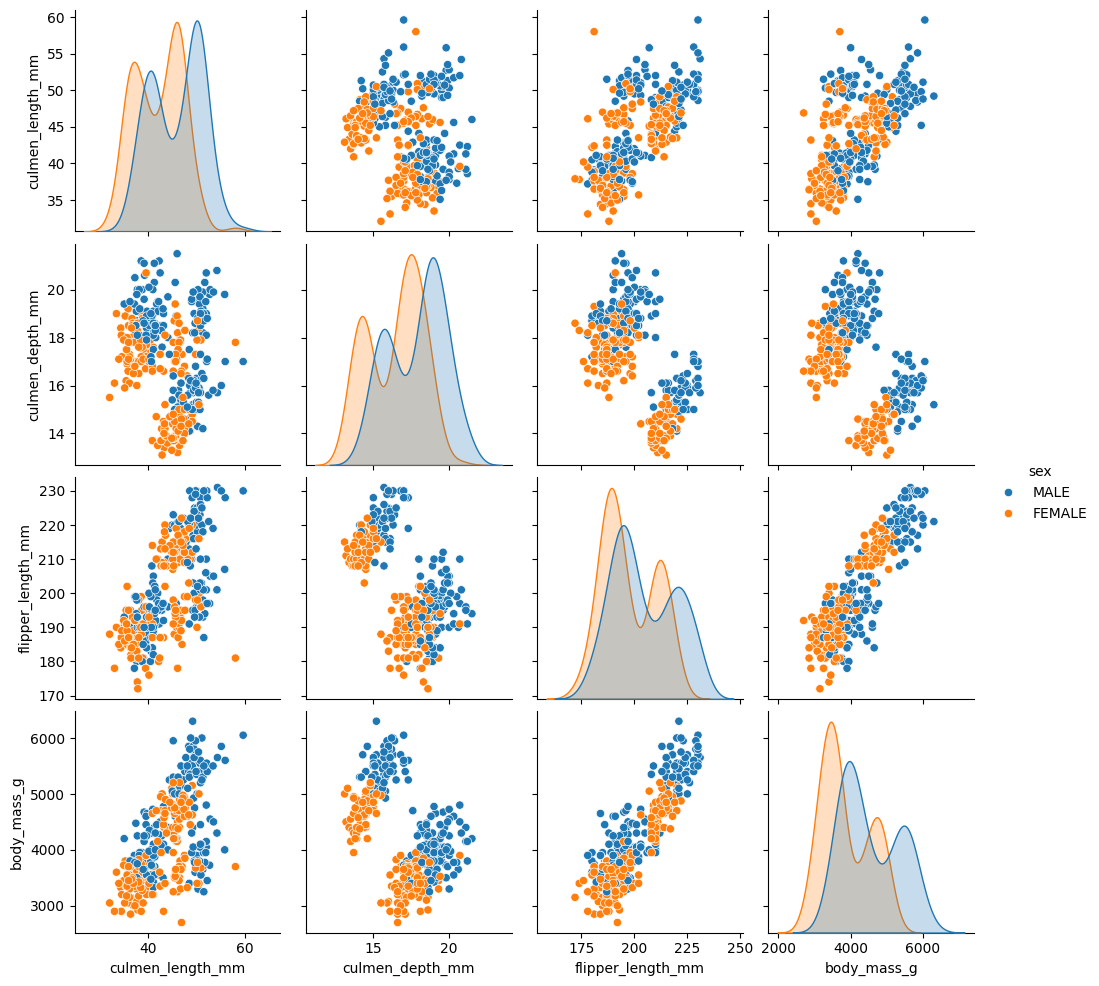

In [5]:
sns.pairplot(peng, hue='sex')

In [24]:
#sns.heatmap(peng.corr(), annot=True, cmap='coolwarm', center=0)

In [11]:
X_peng = peng.drop(['sex'], axis=1)
X_peng = StandardScaler().fit_transform(X_peng)
y_peng = pd.get_dummies(peng['sex'], drop_first=True)

In [12]:
y_peng.head()

,MALE
0,True
1,False
2,False
3,False
4,True


In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
X_peng_pca = pca.fit_transform(X_peng)

In [15]:
pca.components_

array([[ 0.45317384, -0.39851833,  0.57687974,  0.55047832],
       [ 0.60499   ,  0.79295903,  0.00379775,  0.07203231]])

In [16]:
pca.explained_variance_ratio_

array([0.68713344, 0.19641564])

In [17]:
sum(pca.explained_variance_ratio_)

np.float64(0.8835490785942348)

Text(0, 0.5, 'PC2 (Дисперсия: 19.64%)')

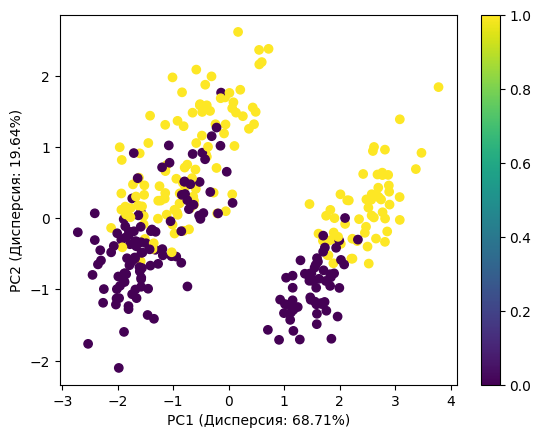

In [18]:
plt.scatter(X_peng_pca[:, 0], X_peng_pca[:, 1], c=y_peng.values)
plt.colorbar()
plt.xlabel("PC1 (Дисперсия: {:.2%})".format(pca.explained_variance_ratio_[0]))
plt.ylabel("PC2 (Дисперсия: {:.2%})".format(pca.explained_variance_ratio_[1]))

Выбрать оптимальное число компонент можно с использованием метода "локтя".

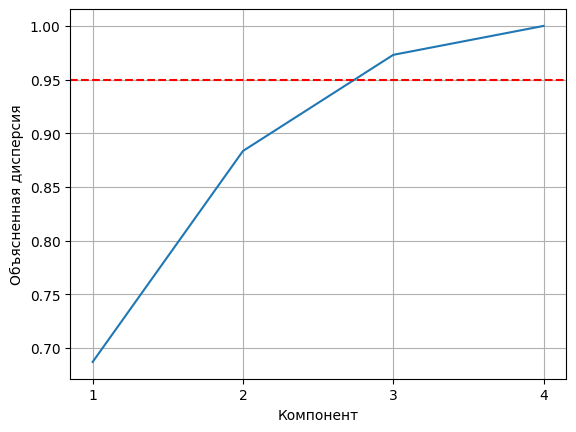

In [19]:
pca_full = PCA().fit(X_peng)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% дисперсии
plt.xticks(range(X_peng.shape[1]), range(1, X_peng.shape[1]+1))
plt.xlabel('Компонент')
plt.ylabel('Объясненная дисперсия')
plt.grid()

In [20]:
pca = PCA(n_components=3)
X_peng_pca = pca.fit_transform(X_peng)

In [21]:
fig = go.Figure(data=[go.Scatter3d(x=X_peng_pca[:, 0], y=X_peng_pca[:, 1], z=X_peng_pca[:, 2],
                                   mode='markers', marker=dict(color=y_peng.values))],
               layout=dict(height=700))
fig.show()

In [22]:
cancer = pd.read_csv('breast_cancer.csv')

In [25]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Разделите данные на X и y, а затем воспользуйтесь методом локтя для определения оптимального количество компонент.

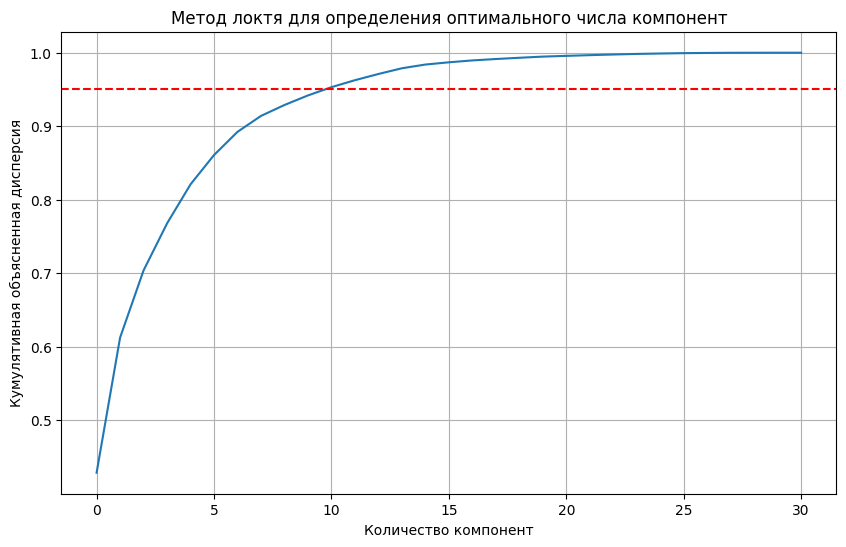

Определение оптимального числа компонент: 11


In [44]:
# Разделение данных на признаки и целевую переменную
X_cancer = cancer.drop(['diagnosis'], axis=1)  # Предположим, что 'diagnosis' - целевая переменная
y_cancer = cancer['diagnosis']

# Стандартизация данных
scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer)

# Метод локтя для определения оптимального количества компонент
pca_full = PCA().fit(X_cancer_scaled)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.title('Метод локтя для определения оптимального числа компонент')
plt.grid(True)
plt.show()

# Определение оптимального числа компонент
optimal_components = np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.95) + 1
print(f"Определение оптимального числа компонент: {optimal_components}")

# Применение PCA с оптимальным числом компонент
pca = PCA(n_components=optimal_components)
X_cancer_pca = pca.fit_transform(X_cancer_scaled)

## Линейный дискриминантный анализ (LDA)

Отличие от PCA: Учитывает метки классов для максимизации межклассового расстояния.

Когда использовать: Когда классы хорошо разделимы.

In [27]:
stud = pd.read_csv('Student_performance_data.csv', index_col=0)

In [28]:
stud

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0


In [29]:
features = stud.drop(['GradeClass'], axis=1)
features = StandardScaler().fit_transform(features)
target = stud['GradeClass']

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [31]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(features, target)

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

Text(0.5, 1.0, 'LDA')

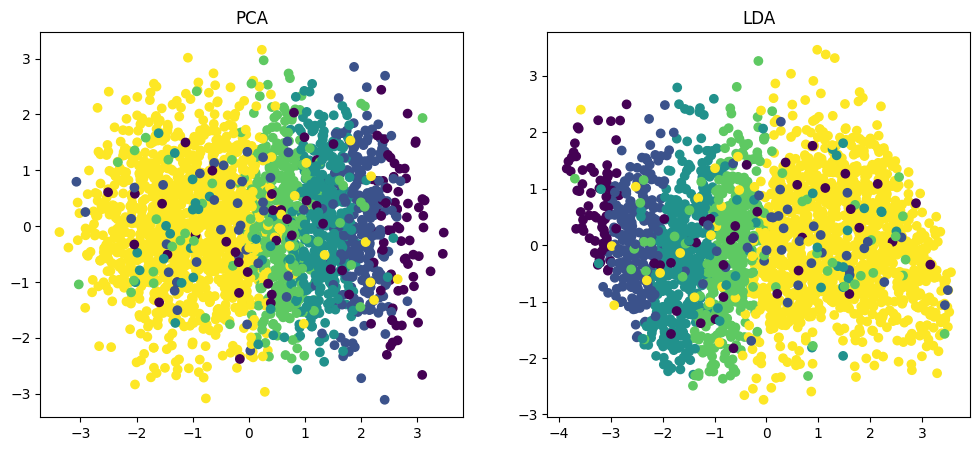

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=target)
ax1.set_title("PCA")
ax2.scatter(X_lda[:, 0], X_lda[:, 1], c=target)
ax2.set_title("LDA")

# Нелинейные методы

## t-SNE

Идея: Сохраняет локальные расстояния между точками.

Ключевые параметры:
- `perplexity`: Баланс между локальной/глобальной структурой (обычно 5-50).
- `random_state`: Для воспроизводимости.

t-SNE требует нормализованных данных.

In [34]:
from sklearn.manifold import TSNE

In [35]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_peng)

Text(0.5, 1.0, 't-SNE: Penguins dataset (perplexity=30)')

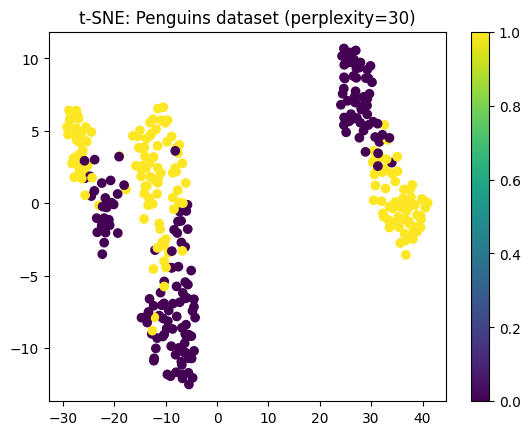

In [36]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_peng.values)
plt.colorbar()
plt.title("t-SNE: Penguins dataset (perplexity=30)")

## UMAP

Если библиотека отсутсвует, ее можно установить:

In [37]:
# !pip install umap-learn

In [38]:
import umap.umap_ as umap

Преимущества перед t-SNE:

- Быстрее (оптимизированный алгоритм).
- Лучше сохраняет глобальную структуру.

Ключевые параметры:
- `n_neighbors`: Аналог perplexity (обычно 5-50).
- `min_dist`: Минимальное расстояние между точками (0.1-0.5).

In [39]:
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_peng)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Text(0.5, 1.0, 'UMAP: Penguins dataset')

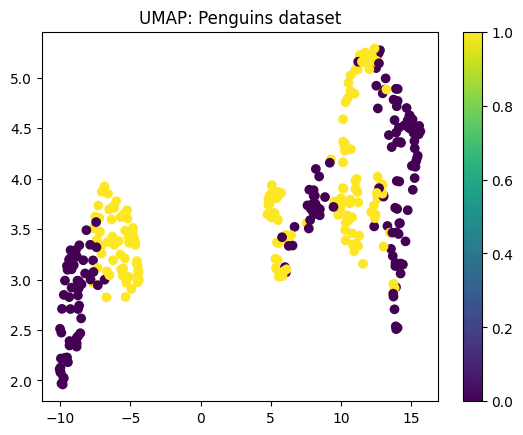

In [40]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_peng.values)
plt.colorbar()
plt.title("UMAP: Penguins dataset")